#Humanitarian Aid to Syria from the United States 
This data is from ForeignAssistance.gov for [Syria](https://www.foreignassistance.gov/explore/country/Syria). The time range for this data is 2010 - 2017

### Importing raw data retrived from foreignassistance.gov

In [0]:
import pandas as pd
sample_syrian_aid = pd.read_excel("syria_foreign_assistance.xlsx", sample=10)
#print(sample_syrian_aid.head(10))

In [2]:
print(list(sample_syrian_aid))

['Award_Identifier', 'Extending_Organization', 'Extending_Organization_Office', 'Accountable_Organization', 'Accountable_Organization_Office', 'Implementing_Organization', 'Implementing_Organization_Type', 'Implementing_Organization_Country', 'Implementing_Organization_DUNS_Number', 'Award_Title', 'Award_Description', 'Award_Status', 'Award_Collaboration_Type', 'Award_Total_Estimated_Value', 'Award_Interagency_Transfer_Status', 'Award_Start_Date', 'Award_End_Date', 'Recipient_Location', 'Award_Transaction_Description ', 'Award_Transaction_Value', 'Award_Transaction_Type', 'Award_Transaction_Date', 'Award_Transaction_Fiscal_Year', 'Award_Transaction_Fiscal_Quarter', 'Award_Transaction_Aid_Type', 'Award_Transaction_Tied_Status', 'Award_Transaction_Flow_Type', 'Award_Transaction_Finance_Type', 'Award_Transaction_DAC_Purpose_Code', 'Award_Transaction_DAC_Purpose_Code_Name', 'Award_Transaction_US_Foreign_Assistance_Code', 'Award_Transaction_US_Foreign_Assistance_Category', 'Award_Transactio

In [0]:
syria_aid = sample_syrian_aid[["Accountable_Organization", "Implementing_Organization", "Award_Status", "Award_Total_Estimated_Value", "Award_Start_Date", "Award_End_Date", "Award_Transaction_Value", "Award_Transaction_DAC_Purpose_Code", "Award_Transaction_DAC_Purpose_Code_Name",]]
#pd.DataFrame(syria_aid.head(10))

In [4]:
syria_aid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 9 columns):
Accountable_Organization                   4884 non-null object
Implementing_Organization                  4884 non-null object
Award_Status                               4884 non-null object
Award_Total_Estimated_Value                4884 non-null float64
Award_Start_Date                           4492 non-null datetime64[ns]
Award_End_Date                             4492 non-null datetime64[ns]
Award_Transaction_Value                    4884 non-null float64
Award_Transaction_DAC_Purpose_Code         4884 non-null int64
Award_Transaction_DAC_Purpose_Code_Name    4884 non-null object
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 343.5+ KB


### Identifying types of aid per year

This isn't exactly what I'm looking for so we will group by other columns.

In [0]:
syria_aid_types = pd.DataFrame((syria_aid.groupby)('Award_Transaction_DAC_Purpose_Code_Name')['Award_Start_Date'].value_counts())
#pd.DataFrame(syria_aid_types)

## Cleaning Data:
###Date range:
The data had dates ranging from as early as 2007. I want to look at aid during the Syrian Civil War so I change the date range to start at 2010. 

In [6]:
import datetime
syria_conflict_aid = syria_aid[(syria_aid["Award_Start_Date"]>datetime.date(2010,1,1))]
pd.DataFrame(syria_conflict_aid.head(10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


,Accountable_Organization,Implementing_Organization,Award_Status,Award_Total_Estimated_Value,Award_Start_Date,Award_End_Date,Award_Transaction_Value,Award_Transaction_DAC_Purpose_Code,Award_Transaction_DAC_Purpose_Code_Name
0,U.S. Agency for International Development,Vendor implementing direct administrative serv...,Implementation,0.0,2017-10-01,2018-09-30,483443.68,91010,Administrative costs
1,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,4494686.0,2015-05-27,2017-09-30,1078607.00,72010,Material relief assistance and services
2,U.S. Agency for International Development,Personal Services Contractors - USAID,Completion,0.0,2012-10-01,2013-09-30,147.80,72010,Material relief assistance and services
3,U.S. Agency for International Development,Vendor implementing direct administrative serv...,Completion,0.0,2015-10-01,2016-09-30,1654.54,43010,Multisector aid
4,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2013-08-20,2015-09-30,-143905.00,72050,Relief co-ordination; protection and support s...
5,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2015-01-28,2017-09-30,1500000.00,72010,Material relief assistance and services
6,U.S. Agency for International Development,"Chemonics International, Inc.",Completion,0.0,2013-01-07,2017-09-30,1799051.79,15220,"Civilian peace-building, conflict prevention a..."
7,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2012-04-01,2015-09-30,18820.00,72010,Material relief assistance and services
8,U.S. Agency for International Development,Vendor implementing direct administrative serv...,Completion,0.0,2014-10-01,2015-09-30,6490.00,43010,Multisector aid
9,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2013-10-01,2015-09-30,27.00,72010,Material relief assistance and services


### Transaction values:
For some award transaction values, entries were negative. 

In [7]:
syria_conflict_aid["Award_Transaction_Value"]=syria_conflict_aid["Award_Transaction_Value"].abs()
pd.DataFrame(syria_conflict_aid.head(10))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Accountable_Organization,Implementing_Organization,Award_Status,Award_Total_Estimated_Value,Award_Start_Date,Award_End_Date,Award_Transaction_Value,Award_Transaction_DAC_Purpose_Code,Award_Transaction_DAC_Purpose_Code_Name
0,U.S. Agency for International Development,Vendor implementing direct administrative serv...,Implementation,0.0,2017-10-01,2018-09-30,483443.68,91010,Administrative costs
1,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,4494686.0,2015-05-27,2017-09-30,1078607.00,72010,Material relief assistance and services
2,U.S. Agency for International Development,Personal Services Contractors - USAID,Completion,0.0,2012-10-01,2013-09-30,147.80,72010,Material relief assistance and services
3,U.S. Agency for International Development,Vendor implementing direct administrative serv...,Completion,0.0,2015-10-01,2016-09-30,1654.54,43010,Multisector aid
4,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2013-08-20,2015-09-30,143905.00,72050,Relief co-ordination; protection and support s...
5,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2015-01-28,2017-09-30,1500000.00,72010,Material relief assistance and services
6,U.S. Agency for International Development,"Chemonics International, Inc.",Completion,0.0,2013-01-07,2017-09-30,1799051.79,15220,"Civilian peace-building, conflict prevention a..."
7,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2012-04-01,2015-09-30,18820.00,72010,Material relief assistance and services
8,U.S. Agency for International Development,Vendor implementing direct administrative serv...,Completion,0.0,2014-10-01,2015-09-30,6490.00,43010,Multisector aid
9,U.S. Agency for International Development,The vendor name has been redacted in accordanc...,Completion,0.0,2013-10-01,2015-09-30,27.00,72010,Material relief assistance and services


## Network building: 
I want to build a network connecting Implementing Organizations to the different types of aid they fund. 

### Grouping data:

In [8]:
syria_aid_orgs = pd.DataFrame({'count' : syria_conflict_aid.groupby(["Implementing_Organization","Award_Transaction_DAC_Purpose_Code_Name"]).size()}).reset_index()
pd.DataFrame(syria_aid_orgs.head(10))

,Implementing_Organization,Award_Transaction_DAC_Purpose_Code_Name,count
0,ACF International,Relief co-ordination; protection and support s...,1
1,AURANITIS LIFE LINE FOR DEVELOPMENT AND TRAINING,"Civilian peace-building, conflict prevention a...",1
2,Agency for Technical Cooperation and Development,Emergency food aid,1
3,Agency for Technical Cooperation and Development,Material relief assistance and services,1
4,Agency for Technical Cooperation and Development,Relief co-ordination; protection and support s...,2
5,American Refugee Committee International,Material relief assistance and services,1
6,American Refugee Committee International,Relief co-ordination; protection and support s...,1
7,"BLUMONT ENGINEERING SOLUTIONS, INC.","Civilian peace-building, conflict prevention a...",4
8,Bert Smith and Co,Administrative costs,1
9,Bert Smith and Co,Multisector aid,1


Seeing how many types of aid there are:

In [9]:
syria_aid.Award_Transaction_DAC_Purpose_Code_Name.drop_duplicates()

0                                    Administrative costs
1                 Material relief assistance and services
3                                         Multisector aid
4       Relief co-ordination; protection and support s...
6       Civilian peace-building, conflict prevention a...
13                   Disaster prevention and preparedness
24                                     Emergency food aid
50               Economic and development policy/planning
117           Energy policy and administrative management
379            Democratic participation and civil society
452                 Security system management and reform
491                                 Sectors not specified
760     Decentralisation and support to subnational go...
825                     Food aid/Food security programmes
2870                                            Elections
Name: Award_Transaction_DAC_Purpose_Code_Name, dtype: object

### Building the actual network:

In [0]:
import networkx as nx

G = nx.Graph()
G.add_nodes_from(syria_aid_orgs["Implementing_Organization"], node_type="organization")
G.add_nodes_from(syria_aid_orgs["Award_Transaction_DAC_Purpose_Code_Name"], node_type="aid")
G.add_weighted_edges_from(syria_aid_orgs.values)

nx.write_graphml(G, "syria_aid.graphml")


### Network with aid amounts:

I want to build a network that shows the connection between implementing organizations and their aid type, and also the amount donated per organization for each kind of aid.

### Grouping and adding values summed:

In [11]:
syria_aid_values = pd.DataFrame({'Total Amount' : syria_conflict_aid.groupby(["Implementing_Organization","Award_Transaction_DAC_Purpose_Code_Name"])["Award_Transaction_Value"].sum()}).reset_index()
pd.DataFrame(syria_aid_values.head(10))

,Implementing_Organization,Award_Transaction_DAC_Purpose_Code_Name,Total Amount
0,ACF International,Relief co-ordination; protection and support s...,100000.00
1,AURANITIS LIFE LINE FOR DEVELOPMENT AND TRAINING,"Civilian peace-building, conflict prevention a...",529720.00
2,Agency for Technical Cooperation and Development,Emergency food aid,5000000.00
3,Agency for Technical Cooperation and Development,Material relief assistance and services,125000.00
4,Agency for Technical Cooperation and Development,Relief co-ordination; protection and support s...,15675000.00
5,American Refugee Committee International,Material relief assistance and services,256900.00
6,American Refugee Committee International,Relief co-ordination; protection and support s...,1500000.00
7,"BLUMONT ENGINEERING SOLUTIONS, INC.","Civilian peace-building, conflict prevention a...",16296889.84
8,Bert Smith and Co,Administrative costs,43203.59
9,Bert Smith and Co,Multisector aid,43203.59


### Building the network:

In [0]:
Gvalues = nx.Graph()
Gvalues.add_nodes_from(syria_aid_orgs["Implementing_Organization"], node_type="organization")
Gvalues.add_nodes_from(syria_aid_orgs["Award_Transaction_DAC_Purpose_Code_Name"], node_type="aid")
Gvalues.add_weighted_edges_from(syria_aid_orgs.values)

nx.write_graphml(Gvalues, "syria_aid_values.graphml")

## Data Visualization:

In [0]:
import matplotlib.pyplot as plt

In [14]:
import numpy as np
syria_conflict_aid["npAward_Transaction_Value"]=np.log(syria_conflict_aid["Award_Transaction_Value"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
import seaborn as sns

#!pip install -U altair vega_datasets jupyterlab

import altair as alt

#alt.Chart(syria_conflict_aid).mark_bar().encode(x="Award_Transaction_DAC_Purpose_Code_Name:N", y="sum(npAward_Transaction_Value):Q", column="Implementing_Organization:O")
#didn't end up using this - it was too difficult to analyse and not very helpful for ultimate goal of data use.


### I want to group types of aid by year, so I am adding a column that has only year for a date value:

In [16]:
syria_conflict_aid["Year"]=syria_conflict_aid["Award_Start_Date"].map(lambda x: x.year)
print(syria_conflict_aid.head(10))

                    Accountable_Organization  \
0  U.S. Agency for International Development   
1  U.S. Agency for International Development   
2  U.S. Agency for International Development   
3  U.S. Agency for International Development   
4  U.S. Agency for International Development   
5  U.S. Agency for International Development   
6  U.S. Agency for International Development   
7  U.S. Agency for International Development   
8  U.S. Agency for International Development   
9  U.S. Agency for International Development   

                           Implementing_Organization    Award_Status  \
0  Vendor implementing direct administrative serv...  Implementation   
1  The vendor name has been redacted in accordanc...      Completion   
2              Personal Services Contractors - USAID      Completion   
3  Vendor implementing direct administrative serv...      Completion   
4  The vendor name has been redacted in accordanc...      Completion   
5  The vendor name has been redacted in

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
syria_aid_years = pd.DataFrame({'Total_Amount' : syria_conflict_aid.groupby(["Year"])["Award_Transaction_Value"].sum()}).reset_index()
pd.options.display.float_format = '${:,.2f}'.format
pd.DataFrame(syria_aid_years)


,Year,Total_Amount
0,2011,"$51,288.00"
1,2012,"$1,869,987,805.64"
2,2013,"$1,369,076,502.92"
3,2014,"$194,999,863.84"
4,2015,"$2,192,005,924.61"
5,2016,"$1,108,257,882.96"
6,2017,"$517,961,632.62"
7,2018,"$21,144,844.11"


In [0]:
syria_aid_years.to_csv('syria_aid_years.csv')

### Aid types sorted by year with summed values

In [23]:
syria_aid_types_values = pd.DataFrame({'Total_Amount' : syria_conflict_aid.groupby(["Year","Award_Transaction_DAC_Purpose_Code_Name"])["Award_Transaction_Value"].sum()}).reset_index()
pd.options.display.float_format = '${:,.2f}'.format

pd.DataFrame(syria_aid_types_values)

,Year,Award_Transaction_DAC_Purpose_Code_Name,Total_Amount
0,2011,Relief co-ordination; protection and support s...,"$51,288.00"
1,2012,Administrative costs,"$211,403.59"
2,2012,"Civilian peace-building, conflict prevention a...","$7,244,660.00"
3,2012,Disaster prevention and preparedness,"$184,582.00"
4,2012,Emergency food aid,"$1,527,001,356.70"
5,2012,Energy policy and administrative management,"$12,820.50"
6,2012,Food aid/Food security programmes,"$3,815,274.21"
7,2012,Material relief assistance and services,"$315,360,259.87"
8,2012,Multisector aid,"$3,946,360.81"
9,2012,Relief co-ordination; protection and support s...,"$12,211,087.96"


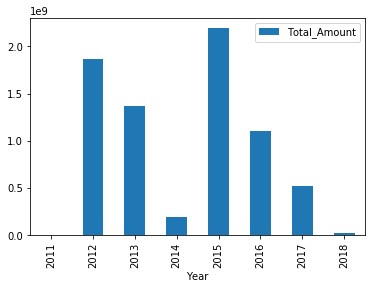

<Figure size 432x288 with 0 Axes>

In [18]:

import matplotlib
import matplotlib.pyplot as plt
ax = plt.gca()
syria_aid_years.plot(kind='bar',x='Year',y='Total_Amount',ax=ax)
pd.options.display.float_format = '${:,.2f}'.format

plt.show()

plt.savefig("aid_per_year.pdf")